## 数据可视化

In [1]:
import os
train = os.listdir('train')
test=os.listdir('test')

训练集总量： 25000
训练集猫的数量： 12500
训练集狗的数量： 12500
测试集总量： 12500


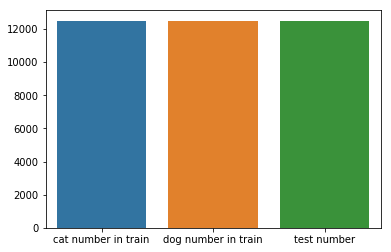

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_cat = list(filter(lambda x:x[:3]=='cat' ,train))
train_dog = list(filter(lambda x:x[:3]=='dog', train))
x = ['cat number in train','dog number in train','test number']

y = [len(train_cat),len(train_dog),len(test)]
sns.barplot(x=x,y=y)  

print('训练集总量：',len(train))
print('训练集猫的数量：',len(train_cat))
print('训练集狗的数量：',len(train_dog))
print('测试集总量：',len(test))       

## 获取训练集异常数据并清除
1. 获取预测异常数据
2. 删除异常数据

In [3]:
import random
import os
import numpy as np
import math
import json
from keras.preprocessing import image
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#从文件读取异常图片文件名
def read_data(filename):
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    outliers = data_dict['outliers']
    
    return outliers

In [12]:
def display_img_list(data_dir, img_list, fig_w=5):
    img_num = len(img_list)
    fig_h = math.ceil(img_num/fig_w)
    plt.figure(figsize=(18, 5*fig_h))
    for i in range(img_num):
        if os.path.exists(data_dir + os.sep + img_list[i]):
            plt.subplot(fig_h, fig_w, i+1)
            plt.gca().set_title(img_list[i])
            plt.imshow(image.load_img(data_dir + os.sep + img_list[i]))
    plt.show()

the total number of outliers: 67
['cat.5355.jpg', 'dog.6475.jpg', 'dog.1895.jpg', 'cat.9983.jpg', 'cat.9171.jpg', 'cat.2509.jpg', 'cat.7920.jpg', 'cat.2433.jpg', 'cat.12378.jpg', 'cat.2893.jpg', 'dog.5604.jpg', 'cat.335.jpg', 'cat.7671.jpg', 'cat.6699.jpg', 'dog.4367.jpg', 'cat.2939.jpg', 'dog.10801.jpg', 'cat.6442.jpg', 'cat.2621.jpg', 'cat.10712.jpg', 'dog.10237.jpg', 'cat.1485.jpg', 'cat.8470.jpg', 'cat.12227.jpg', 'cat.3731.jpg', 'cat.5820.jpg', 'cat.6402.jpg', 'cat.8854.jpg', 'cat.8921.jpg', 'dog.2614.jpg', 'cat.10029.jpg', 'cat.7487.jpg', 'cat.3216.jpg', 'cat.8456.jpg', 'cat.7194.jpg', 'cat.5418.jpg', 'cat.7411.jpg', 'cat.10946.jpg', 'cat.11565.jpg', 'cat.5351.jpg', 'cat.7377.jpg', 'cat.10700.jpg', 'cat.4833.jpg', 'cat.9456.jpg', 'cat.4688.jpg', 'cat.3738.jpg', 'cat.2457.jpg', 'cat.7564.jpg', 'cat.4965.jpg', 'cat.5527.jpg', 'cat.3845.jpg', 'cat.4338.jpg', 'cat.4852.jpg', 'cat.5324.jpg', 'cat.11184.jpg', 'cat.6915.jpg', 'cat.2337.jpg', 'cat.7968.jpg', 'cat.6345.jpg', 'dog.10161.jp

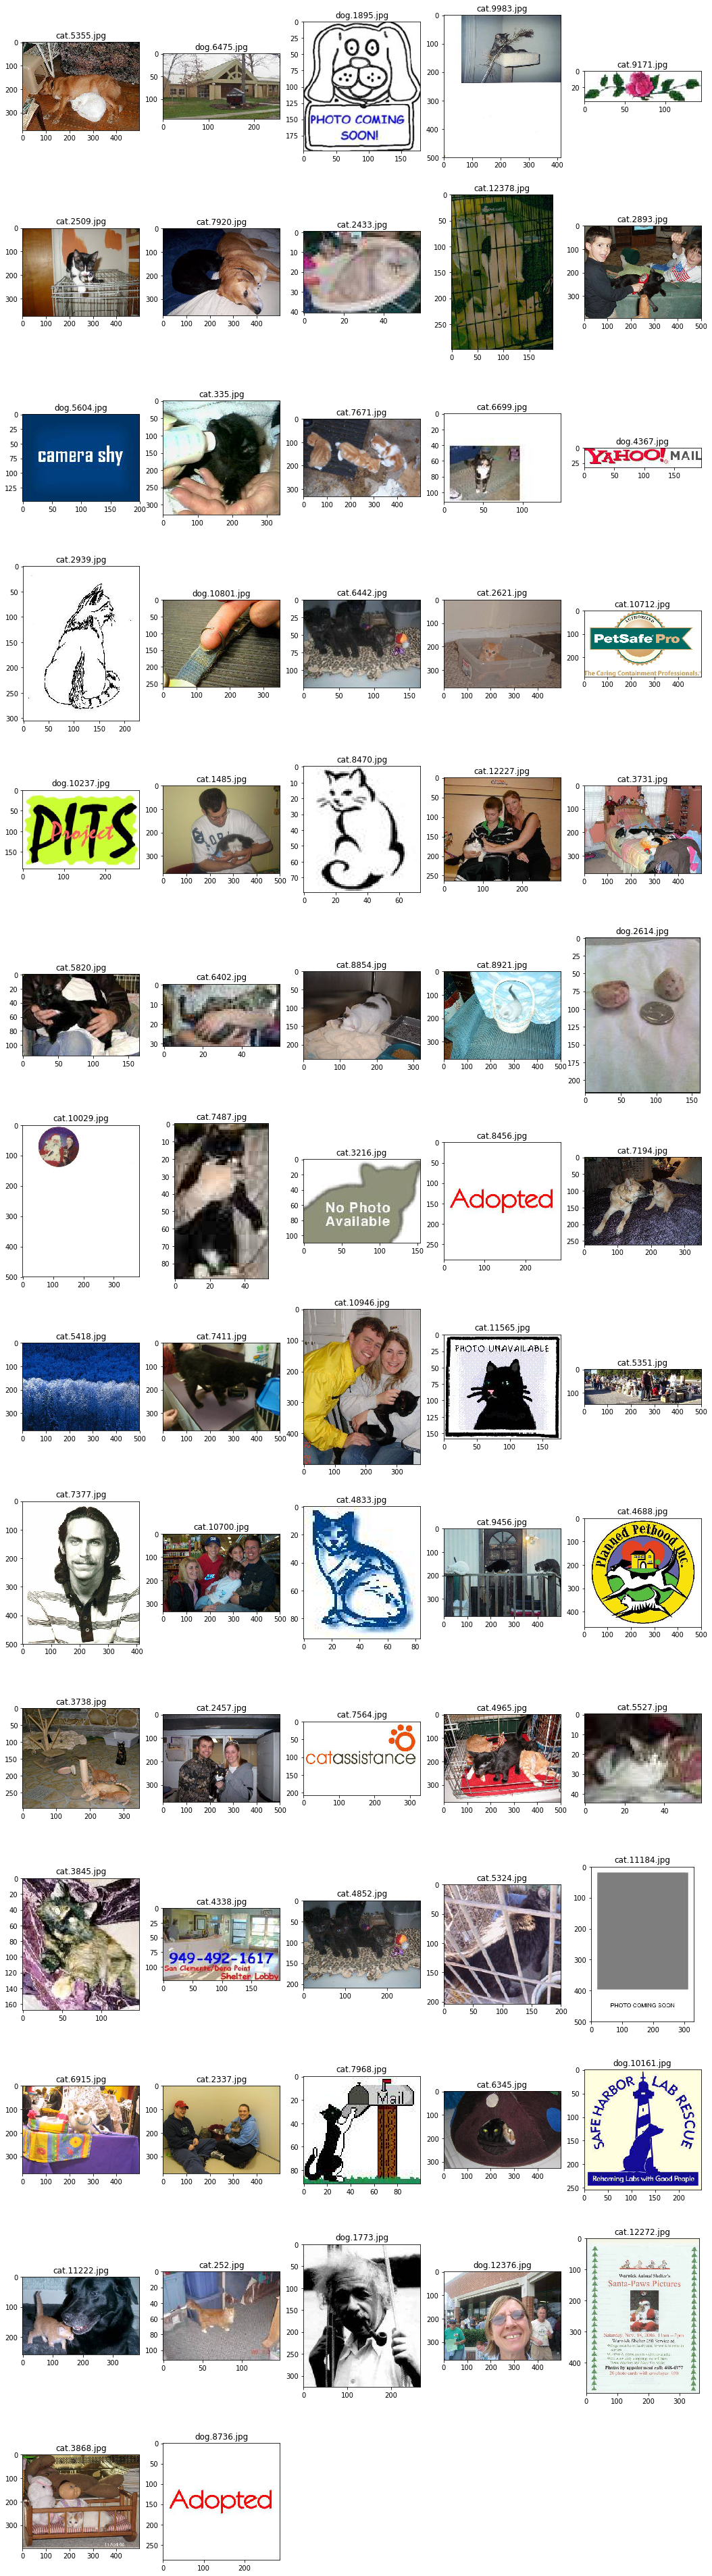

In [14]:
#获取总的异常图片
total_outliers = read_data("total_outliers.json")
print('the total number of outliers:',len(total_outliers))
print(total_outliers)
display_img_list("train", total_outliers)

In [15]:
def remove_outliers(data_dir,img_list):
    img_num = len(img_list)
    for i in range(img_num):
        if os.path.exists(data_dir + os.sep + img_list[i]):
            os.remove(data_dir + os.sep + img_list[i])
            print(data_dir + os.sep + img_list[i]+'----removed')


In [16]:
pre_remove_len = len(os.listdir('train'))
remove_outliers('train', total_outliers)
print('train移除前数量：',pre_remove_len)
print('train移除后数量：',len(os.listdir('train')))
print('train移除图片数量：',len(total_outliers))

train/cat.5355.jpg----removed
train/dog.6475.jpg----removed
train/dog.1895.jpg----removed
train/cat.9983.jpg----removed
train/cat.9171.jpg----removed
train/cat.2509.jpg----removed
train/cat.7920.jpg----removed
train/cat.2433.jpg----removed
train/cat.12378.jpg----removed
train/cat.2893.jpg----removed
train/dog.5604.jpg----removed
train/cat.335.jpg----removed
train/cat.7671.jpg----removed
train/cat.6699.jpg----removed
train/dog.4367.jpg----removed
train/cat.2939.jpg----removed
train/dog.10801.jpg----removed
train/cat.6442.jpg----removed
train/cat.2621.jpg----removed
train/cat.10712.jpg----removed
train/dog.10237.jpg----removed
train/cat.1485.jpg----removed
train/cat.8470.jpg----removed
train/cat.12227.jpg----removed
train/cat.3731.jpg----removed
train/cat.5820.jpg----removed
train/cat.6402.jpg----removed
train/cat.8854.jpg----removed
train/cat.8921.jpg----removed
train/dog.2614.jpg----removed
train/cat.10029.jpg----removed
train/cat.7487.jpg----removed
train/cat.3216.jpg----removed
train

训练集总量： 24933
训练集猫的数量： 12444
训练集狗的数量： 12489
测试集总量： 12500


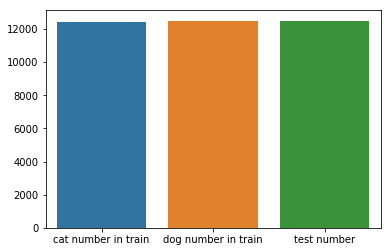

In [4]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import shutil

train = os.listdir('train')
test=os.listdir('test')
train_cat = list(filter(lambda x:x[:3]=='cat' ,train))
train_dog = list(filter(lambda x:x[:3]=='dog', train))
x = ['cat number in train','dog number in train','test number']

y = [len(train_cat),len(train_dog),len(test)]
sns.barplot(x=x,y=y)  

print('训练集总量：',len(train))
print('训练集猫的数量：',len(train_cat))
print('训练集狗的数量：',len(train_dog))
print('测试集总量：',len(test))

## 数据预处理
1. 加载训练数据
2. 训练数据数据混洗
3. 训练数据打标
4. 训练数据切分

In [5]:
import os
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications import inception_v3
import numpy as np
from tqdm import tqdm 
import random

train_filenames = os.listdir('train')

print('训练图片总量：',len(train_filenames))

random.shuffle(train_filenames)
print(train_filenames[:10])

 
n= len(train_filenames)
Image_size = 299
X = np.zeros((n,Image_size,Image_size,3),dtype =  np.float16)
Y = np.zeros((n,1),dtype =  np.float16)

for i, img_file in enumerate(tqdm(train_filenames)):
    img = image.load_img('./train/'+img_file, target_size = (Image_size,Image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    X[i] = preprocess_input(x)
    Y[i] = 1 if 'dog' in img_file else 0

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2,random_state=42)
print(X_train.shape, Y_valid.shape)
print('success')

  0%|          | 2/24933 [00:00<23:26, 17.72it/s]

训练图片总量： 24933
['cat.2291.jpg', 'dog.12289.jpg', 'cat.6156.jpg', 'cat.8320.jpg', 'cat.2600.jpg', 'cat.1860.jpg', 'cat.5448.jpg', 'cat.11705.jpg', 'cat.4757.jpg', 'cat.1153.jpg']


100%|██████████| 24933/24933 [04:57<00:00, 83.78it/s]


(19946, 299, 299, 3) (4987, 1)
success


## 构建模型
1. 构建不带分类器模型InceptionV3
2. 添加全局平均池化层
3. 添加一个分类器

In [7]:
from keras.applications import inception_v3
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Lambda
from keras import optimizers

# 构建不带分类器的预训练模型
base_model = inception_v3.InceptionV3(input_tensor = Input((Image_size,Image_size,3)), weights = 'imagenet',include_top = False)

# 添加全局平均池化层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

# 添加一个分类器
predictions = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)

print('模型层数',len(base_model.layers))

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 280 layers and unfreeze the rest:
for layer in base_model.layers[:280]:
    layer.trainable = False

for layer in base_model.layers[280:]:
    layer.trainable = True
opt = optimizers.Adam(lr=1e-5, decay=1e-6)
model.compile(optimizer = opt, 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

模型层数 311


In [ ]:
model.summary()

In [ ]:
from keras.utils.visualize_util import plot
plot(model, to_file='model_InceptionV3.png',show_shapes=True)

In [10]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=1, verbose=0, mode='min'),
             ModelCheckpoint(filepath='model_file002_InceptionV3.h5', monitor='val_loss', verbose=0, save_best_only=True)]

result = model.fit(X_train,Y_train, batch_size = 128,epochs = 8, validation_data=(X_valid, Y_valid), callbacks=callbacks)

Train on 19946 samples, validate on 4987 samples
Epoch 1/8
19946/19946 [==============================] - 402s 20ms/step - loss: 0.2104 - acc: 0.9293 - val_loss: 0.0705 - val_acc: 0.9864
Epoch 2/8
19946/19946 [==============================] - 325s 16ms/step - loss: 0.0669 - acc: 0.9792 - val_loss: 0.0464 - val_acc: 0.9872
Epoch 3/8
19946/19946 [==============================] - 325s 16ms/step - loss: 0.0484 - acc: 0.9837 - val_loss: 0.0377 - val_acc: 0.9880
Epoch 4/8
19946/19946 [==============================] - 326s 16ms/step - loss: 0.0387 - acc: 0.9864 - val_loss: 0.0317 - val_acc: 0.9900
Epoch 5/8
19946/19946 [==============================] - 325s 16ms/step - loss: 0.0315 - acc: 0.9894 - val_loss: 0.0318 - val_acc: 0.9898


## 模型预测图

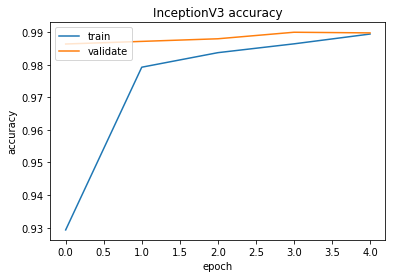

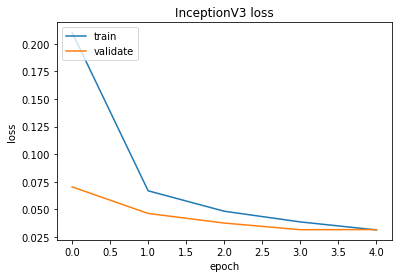

In [11]:
import matplotlib.pyplot as plt
def plot_result(result, model_name):
    # summarize history for accuracy
    plt.plot(result.history['acc'])
    plt.plot(result.history['val_acc'])
    plt.title('%s accuracy'%model_name)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.title('%s loss'%model_name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    
plot_result(result,'InceptionV3')

## 预测测试集
1. 混洗测试集
2. 加载测试集
3. 预测测试集

In [12]:
import os

test_filenames = os.listdir('test')
print(len(test_filenames))

import random
random.shuffle(test_filenames)
print(test_filenames[:10])

from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from tqdm import tqdm  

n = len(test_filenames)
Image_size = 299
X_test = np.zeros((n,Image_size,Image_size,3),dtype =  np.float16)

for i, img_file in enumerate(tqdm(test_filenames)):
    img = image.load_img('./test/'+img_file, target_size = (Image_size,Image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    X_test[i] = preprocess_input(x)

  0%|          | 1/12500 [00:00<29:24,  7.08it/s]

12500
['2864.jpg', '8216.jpg', '3074.jpg', '3899.jpg', '6219.jpg', '3083.jpg', '6542.jpg', '9666.jpg', '5135.jpg', '2937.jpg']


100%|██████████| 12500/12500 [02:27<00:00, 84.77it/s]


In [13]:
y_pred = model.predict(X_test, verbose = 1)


12500/12500 [==============================] - 185s 15ms/step


## 生成预测结果

In [14]:
import pandas as pd

y_pred = y_pred.clip(min = 0.005, max = 0.995)

df = pd.read_csv("sampleSubmission.csv")

for i, fname in enumerate(test_filenames):
    index = int(fname[fname.rfind(os.sep)+1:fname.rfind('.')])
    df.loc[index-1, ['label']]= y_pred[i]
    
df.to_csv('predict002_InceptionV3.csv',index = None)
df.head(10)

id     label
0   1  0.989206
1   2  0.993856
2   3  0.993892
3   4  0.994194
4   5  0.005000
5   6  0.005000
6   7  0.005000
7   8  0.005000
8   9  0.005000
9  10  0.005000

In [15]:
import pandas as pd

y_pred = y_pred.clip(min = 0.01, max = 0.99)

df = pd.read_csv("sampleSubmission.csv")

for i, fname in enumerate(test_filenames):
    index = int(fname[fname.rfind(os.sep)+1:fname.rfind('.')])
    df.loc[index-1, ['label']]= y_pred[i]
    
df.to_csv('predict003_InceptionV3.csv',index = None)
df.head(10)

id     label
0   1  0.989206
1   2  0.990000
2   3  0.990000
3   4  0.990000
4   5  0.010000
5   6  0.010000
6   7  0.010000
7   8  0.010000
8   9  0.010000
9  10  0.010000

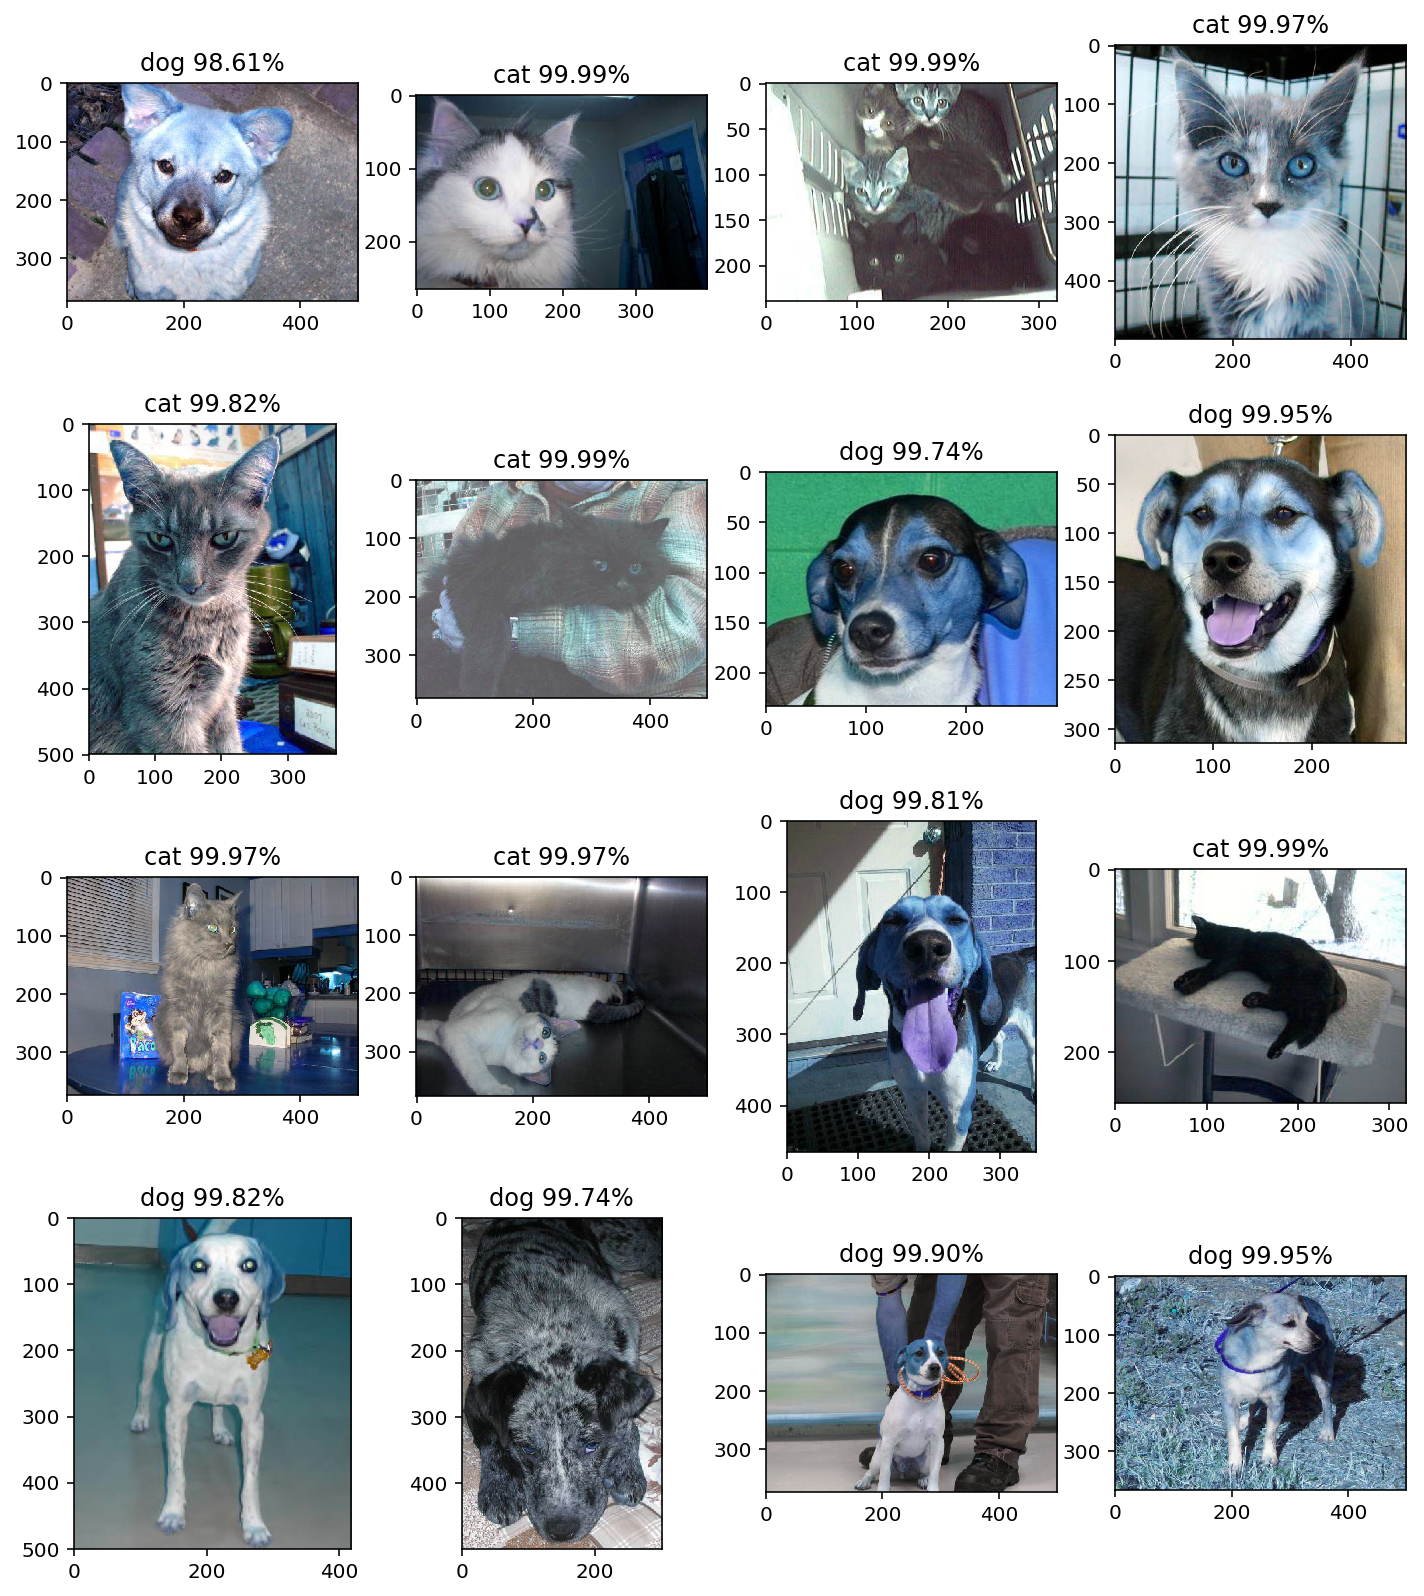

In [17]:
import matplotlib.pyplot as plt
import random
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    
    img = cv2.imread('test/%d.jpg' % random.randint(1, 12500))
    plt.imshow(img)
    img = cv2.resize(img, (299, 299))
    x = img.copy()
    # 用xception里面的preprocess_input来预处理处理图片
    x.astype(np.float32)
    x = (x -  255.0/2)/ 255.0
    
    
    prediction = model.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))